In [1]:
from fastai.vision import *

In [2]:
folder = 'ghibli'
file = 'ghibli.txt'
folder2 = 'disney'
file2 = 'disney.txt'

In [3]:
path = Path('data/studio2')
dest = path/folder
dest2 = path/folder2
dest.mkdir(parents=True, exist_ok=True)
dest2.mkdir(parents=True, exist_ok=True)

In [4]:
path.ls()

[WindowsPath('data/studio2/disney'), WindowsPath('data/studio2/ghibli')]

In [5]:
#download_images(path/file,dest)
#download_images(path/file2,dest2)

In [6]:
np.random.seed(32)
data = ImageDataBunch.from_folder(path, train='.',valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data

ImageDataBunch;

Train: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
disney,disney,disney,disney,disney
Path: data\studio2;

Valid: LabelList (156 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
ghibli,disney,disney,ghibli,disney
Path: data\studio2;

Test: None

In [8]:
data.classes

['disney', 'ghibli']

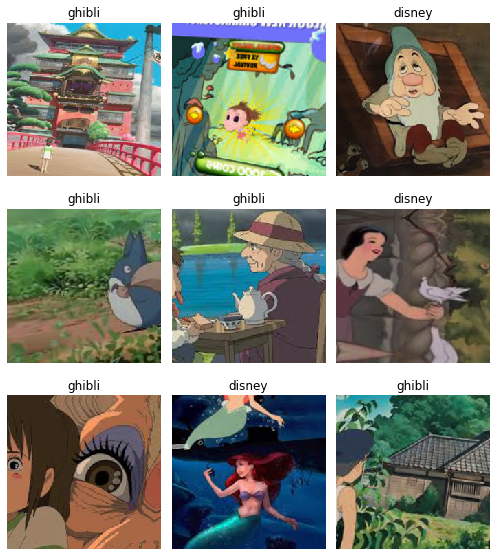

In [9]:
data.show_batch(rows=3,figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['disney', 'ghibli'], 2, 624, 156)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.954903,0.387097,0.173077,01:09
1,0.681332,0.377562,0.108974,00:40
2,0.517195,0.270547,0.089744,00:40
3,0.445369,0.258397,0.096154,00:40


In [13]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


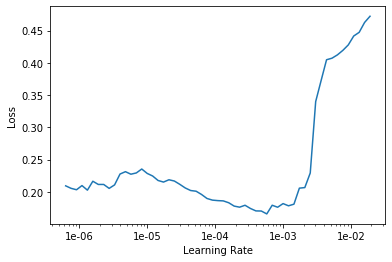

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.167707,0.448303,0.121795,00:48
1,0.133592,0.290795,0.096154,00:49


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

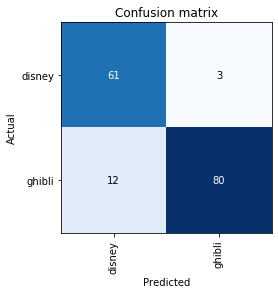

In [21]:
interp.plot_confusion_matrix()